- Aulas F085 a F087

___

In [1]:
import pandas as pd

In [2]:
# Importando a base de dados
arquivo_caminho = 'kc_house_data.csv'

dataset = pd.read_csv(arquivo_caminho, sep=',', header=0)

# Transformando a coluna 'date' em um datetime
dataset['date'] = pd.to_datetime(dataset['date'])

# Tabelas Pivot

As tabelas pivot (ou tabelas dinâmicas) são uma forma de reestruturar e resumir dados em um DataFrame, permitindo análises rápidas e agregações personalizadas, em outras palavras, elas são úteis para fazer agrupamento nos dados.


Nesse exemplo abaixo iremos contar a quantidade de imóveis agrupados pelas colunas waterfront e floors;

- No parâmetro **index** informo as colunas que serão usadas para agregação;
- No parâmetro **aggfunc** é usado uma função de agregação, nesse parâmetro é que definimos (no nosso exemplo será a função de count);
- No parâmetro **margins=True**, calculamos a quantidade total no final da tabela.

In [3]:
dataset.pivot_table('id', index=['waterfront', 'floors'], aggfunc='count', margins=True)

id
waterfront floors       
0          1.0     10623
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21613

___

# Crosstab ou Tabulação Cruzada

O crosstab em Pandas é uma função que cria uma tabela de contingência — ou seja, uma tabela que mostra a frequência de ocorrência entre duas (ou mais) variáveis categóricas.

É muito usado quando você quer ver como duas variáveis se relacionam em termos de contagem

In [5]:
# Essa funcionalidade cruza valores das variáveis;
# Nesse nosso exemplo podemos ver qual a distribuição dos imóveis por número de quartos com relação a sua condição.

pd.crosstab(dataset['bedrooms'], dataset['condition'])

# Podemos ver que imóveis com 3 quartos estão mais na condição 5

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


### Plotagem da tabela cruzada

<Axes: title={'center': 'Condition by Bedrooms'}, xlabel='bedrooms'>

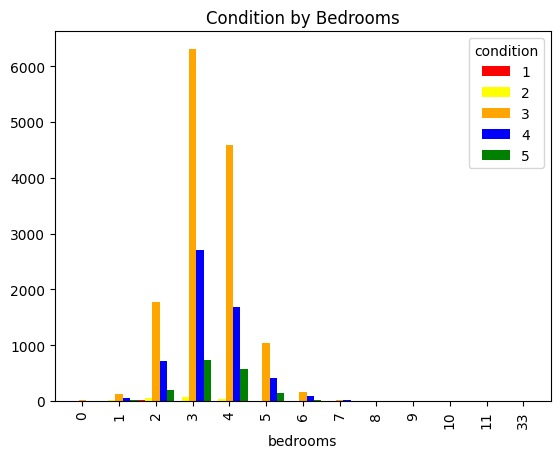

In [7]:
# Usamos o método plot com um gráfico de barras
table = pd.crosstab(dataset['bedrooms'], dataset['condition'])
table.plot(kind='bar', width=1.0, color=['red', 'yellow', 'orange', 'blue', 'green'], title='Condition by Bedrooms', grid=False)

___

# Trabalhando com Excel

Com o pandas, podemos trabalhar com Excel e isso é muito bom, pois, sabemos que temos muita informação nos dias de hoje em planilhas do excel;

Diante disso você pode usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados.

- Leitura de uma planilha excel:

In [ ]:
df_excel = pd.read_excel('caminho_do_arquivo.xlsx', sheetname=0, header=0)
# sheetname é o nome da planilha dentro do arquivo xlsx;
# header é o indicativo de onde está o nome das colunas (0 é coluna 1 | 1 é coluna 2 | e por ai em diante)

# Caso eu queria especificar qual será o indice basta adicionar o parâmetro index_col=X
# onde X é o número da coluna que eu quero como indice.

___

# Gerar planilhas a partir de DataFrames

Para esse exemplo, iremos utilizar o dataFrame de imóveis que a gente vem trabalhando.

Porém, para não ficar um arquivo muito grande, iremos pegar apenas algumas colunas e transformar em planilha

In [12]:
colunas = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']

dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3,1.00,1180,1.0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0
2,5631500400,180000.0,2,1.00,770,1.0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0


In [13]:
# Escrevendo no disco a planilha sem o valor do indice
dataset[colunas].to_excel('planilha_pandas.xlsx', index=False)

___

# Mesclagem de dados

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [3]:
# Importando os dataset's acima
orders = pd.read_csv('datasets/olist_orders_dataset.csv')

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Carregando o dataset de itens pedidos**

In [7]:
orders_items = pd.read_csv('datasets/olist_order_items_dataset.csv')

In [8]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Opções de Merge

## Tipos de JOIN (ligações)

- **INNER JOIN** (Padrão): Retorna apenas os registros que contém a mesma chave **em ambos** os DataFrames;
- **LEFT JOIN**: Retorna os registros do DataFrame **à esquerda**, independentemente se contém um correspondente à direita;
- **RIGHT JOIN**: Retorna todos os registros do DataFrame **à direita**, independentemente se contém um correspondente à esquerda;
- **OUTER JOIN**: Retorna todos os registros de ambos os DataFrames.

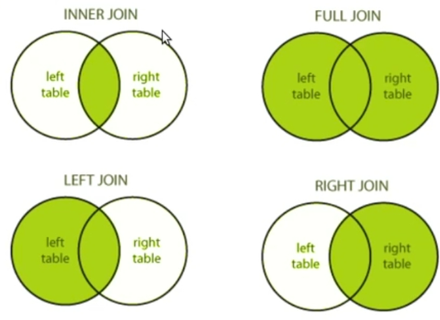

**Consultando os dados nos dois datasets e ligando através da chave order_id**

    

- Selecionando os atributos do dataset **orders (pedidos)**.
    - order_id (id do produto);
    - order_status (status do produto);
    - order_approved_at (data e hora da aprovação do pedido).

- Selecionando os atributos do dataset **orders_items (items do pedido)**.
    - product_id (id do produto)
    - seller_id (id do vendedor)
    - price (preço do produto)
    - freight_value (valor do frete)

In [12]:
query = pd.merge(
    orders[['order_id', 'order_status', 'order_approved_at']], # primeiro parâmetro será a 'tabela' da esquerda
    oders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], # O outro parâmetro será a 'tabela' da direita
    on='order_id' # E o terceiro parâmetro serve para especificar qual será a minha chave de ligação (a PK)
)

In [13]:
query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


**Consultando todos os pedidos independente se contém itens associados - Left Join**

In [15]:
query = pd.merge(
    orders[['order_id', 'order_status', 'order_approved_at']], # primeiro parâmetro será a 'tabela' da esquerda
    oders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], # O outro parâmetro será a 'tabela' da direita
    on='order_id', # E o terceiro parâmetro serve para especificar qual será a minha chave de ligação (a PK)
    how='left'
)

In [16]:
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64

**Consultando todos os pedidos independente se contém itens associados - Right Join**

In [17]:
query = pd.merge(
    orders[['order_id', 'order_status', 'order_approved_at']], # primeiro parâmetro será a 'tabela' da esquerda
    oders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], # O outro parâmetro será a 'tabela' da direita
    on='order_id', # E o terceiro parâmetro serve para especificar qual será a minha chave de ligação (a PK)
    how='right'
)

In [18]:
query.isnull().sum()

order_id              0
order_status          0
order_approved_at    15
product_id            0
seller_id             0
price                 0
freight_value         0
dtype: int64

**Consultando todos os registros nos dois DataFrames - Outer Join**

In [19]:
query = pd.merge(
    orders[['order_id', 'order_status', 'order_approved_at']], # primeiro parâmetro será a 'tabela' da esquerda
    oders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], # O outro parâmetro será a 'tabela' da direita
    on='order_id', # E o terceiro parâmetro serve para especificar qual será a minha chave de ligação (a PK)
    how='outer'
)

In [20]:
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64